# Loan Eligibility Prediction Using Machine Learning Approach

In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the dataset in panda's dataframe

df = pd.read_csv('train_loan.csv')
df1 = pd.read_csv('test_loan1.csv')

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,Y
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,Y
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban,Y
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,Y


# Data Pre-processing

In [5]:
#identifying null values in train set

df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
#identifying null values in test set

df1.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
Loan_Status           9
dtype: int64

In [7]:
# Dropping duplicates in train data
df = df.drop_duplicates(keep='first')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [8]:
# Dropping duplicates in test data
df1 = df1.drop_duplicates(keep='first')
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,Y
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,Y
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban,Y
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,Y


In [9]:
# Applying mean/median/mode imputation to both sets

df['Gender'].fillna(df['Gender'].mode()[0],inplace = True)
df1['Gender'].fillna(df1['Gender'].mode()[0],inplace = True)

df['Married'].fillna(df['Married'].mode()[0],inplace = True)

df['Dependents'].fillna(df['Dependents'].mode()[0],inplace = True)
df1['Dependents'].fillna(df1['Dependents'].mode()[0],inplace = True)

df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace = True)
df1['Self_Employed'].fillna(df1['Self_Employed'].mode()[0],inplace = True)

df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace = True)
df1['LoanAmount'].fillna(df1['LoanAmount'].mean(),inplace = True)

df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace = True)
df1['Loan_Amount_Term'].fillna(df1['Loan_Amount_Term'].mean(),inplace = True)

df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace = True)
df1['Credit_History'].fillna(df1['Credit_History'].mode()[0],inplace = True)

df1['Loan_Status'].fillna(df1['Loan_Status'].mode()[0],inplace = True)

In [10]:
# train data check
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
# test data check
df1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
df = df.astype({"CoapplicantIncome":'int', "LoanAmount":'int', "Loan_Amount_Term":'int', "Credit_History":'int'})

In [13]:
df.dtypes

Loan_ID              object
Gender               object
Married              object
Dependents           object
Education            object
Self_Employed        object
ApplicantIncome       int64
CoapplicantIncome     int32
LoanAmount            int32
Loan_Amount_Term      int32
Credit_History        int32
Property_Area        object
Loan_Status          object
dtype: object

In [14]:
df1 = df1.astype({"LoanAmount":'int', "Loan_Amount_Term":'int', "Credit_History":'int'})

In [15]:
df1.dtypes

Loan_ID              object
Gender               object
Married              object
Dependents           object
Education            object
Self_Employed        object
ApplicantIncome       int64
CoapplicantIncome     int64
LoanAmount            int32
Loan_Amount_Term      int32
Credit_History        int32
Property_Area        object
Loan_Status          object
dtype: object

In [16]:
for col in df1:
   print(f'{col}: {df1[col].unique()}')

Loan_ID: ['LP001015' 'LP001022' 'LP001031' 'LP001035' 'LP001051' 'LP001054'
 'LP001055' 'LP001056' 'LP001059' 'LP001067' 'LP001078' 'LP001082'
 'LP001083' 'LP001094' 'LP001096' 'LP001099' 'LP001105' 'LP001107'
 'LP001108' 'LP001115' 'LP001121' 'LP001124' 'LP001128' 'LP001135'
 'LP001149' 'LP001153' 'LP001163' 'LP001169' 'LP001174' 'LP001176'
 'LP001177' 'LP001183' 'LP001185' 'LP001187' 'LP001190' 'LP001203'
 'LP001208' 'LP001210' 'LP001211' 'LP001219' 'LP001220' 'LP001221'
 'LP001226' 'LP001230' 'LP001231' 'LP001232' 'LP001237' 'LP001242'
 'LP001268' 'LP001270' 'LP001284' 'LP001287' 'LP001291' 'LP001298'
 'LP001312' 'LP001313' 'LP001317' 'LP001321' 'LP001323' 'LP001324'
 'LP001332' 'LP001335' 'LP001338' 'LP001347' 'LP001348' 'LP001351'
 'LP001352' 'LP001358' 'LP001359' 'LP001361' 'LP001366' 'LP001368'
 'LP001375' 'LP001380' 'LP001386' 'LP001400' 'LP001407' 'LP001413'
 'LP001415' 'LP001419' 'LP001420' 'LP001428' 'LP001445' 'LP001446'
 'LP001450' 'LP001452' 'LP001455' 'LP001466' 'LP00147

# EDA Graph Plottings

<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>

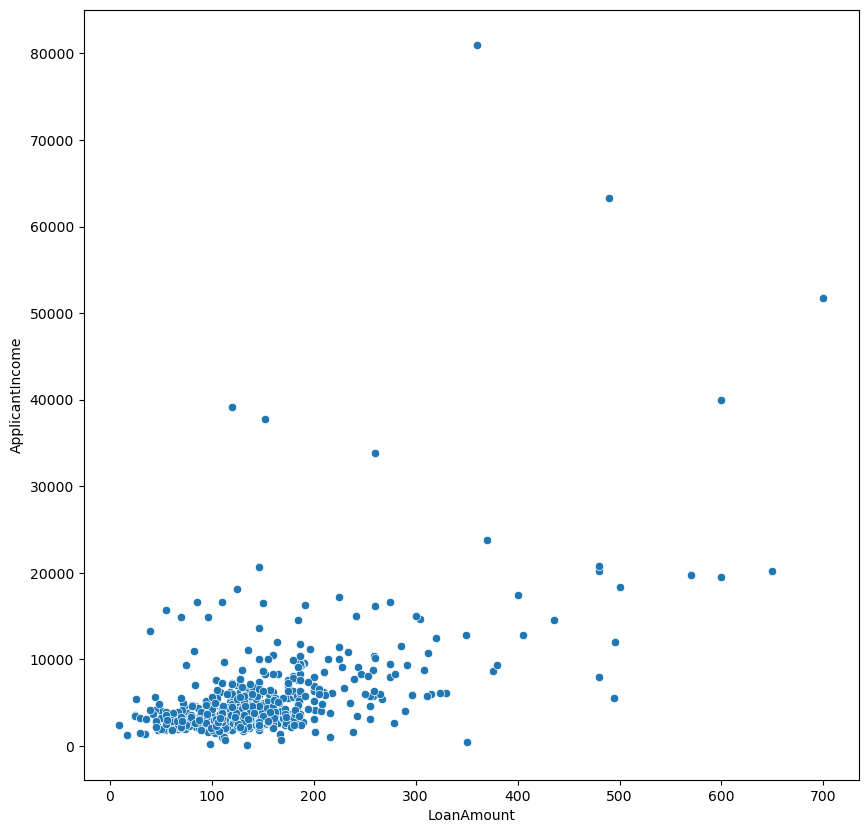

In [17]:
from sklearn import linear_model

#Scatter plot without hue
plt.figure(figsize=(10,10))
sns.scatterplot(data=df,y='ApplicantIncome',x='LoanAmount')

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='ApplicantIncome'>

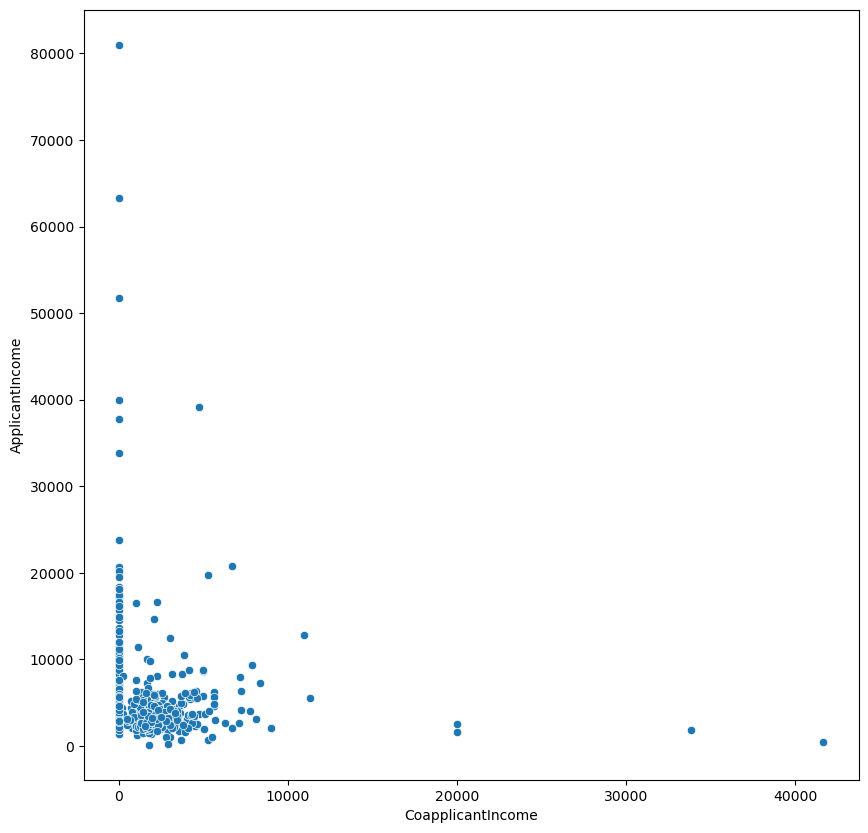

In [18]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df,y='ApplicantIncome',x='CoapplicantIncome')

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='ApplicantIncome'>

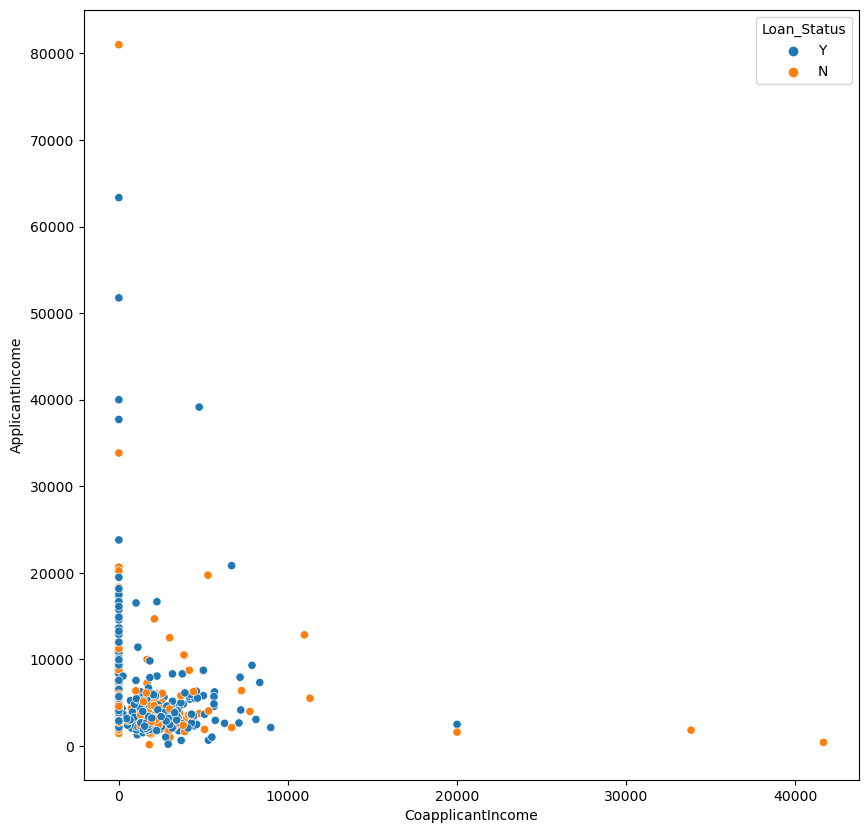

In [19]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df,y='ApplicantIncome',x='CoapplicantIncome',hue='Loan_Status')

In [20]:
df3 = df[['ApplicantIncome','Loan_Status']]
df3

,ApplicantIncome,Loan_Status
0,5849,Y
1,4583,N
2,3000,Y
3,2583,Y
4,6000,Y
...,...,...
609,2900,Y
610,4106,Y
611,8072,Y
612,7583,Y


<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>

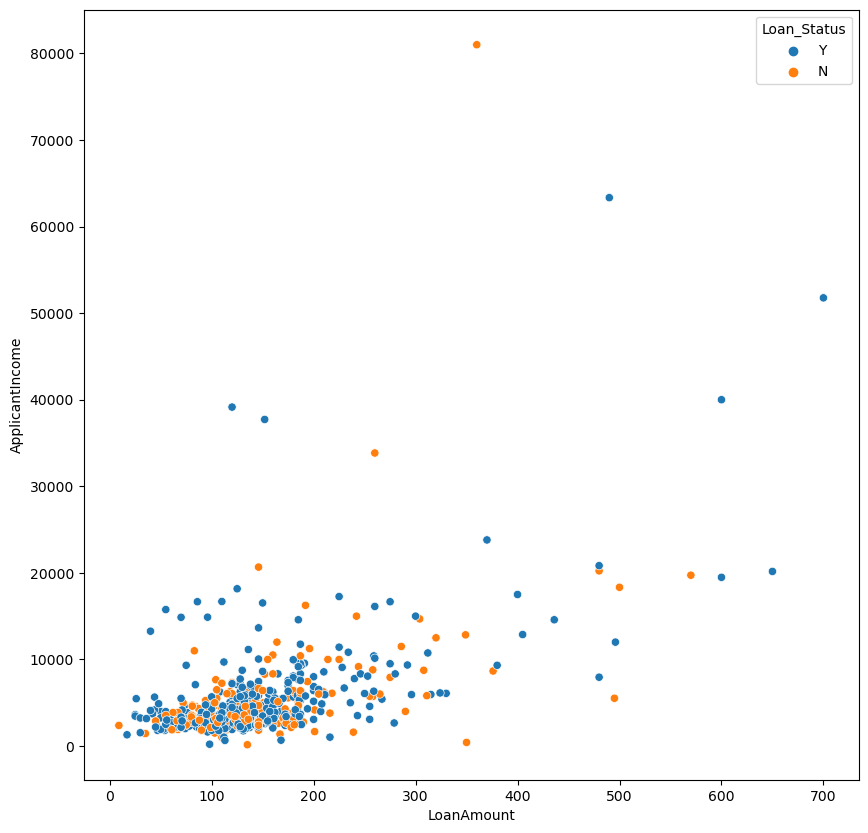

In [21]:
#scatterplot with hue
plt.figure(figsize=(10,10))
sns.scatterplot(data=df,y='ApplicantIncome',x='LoanAmount',hue='Loan_Status')

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

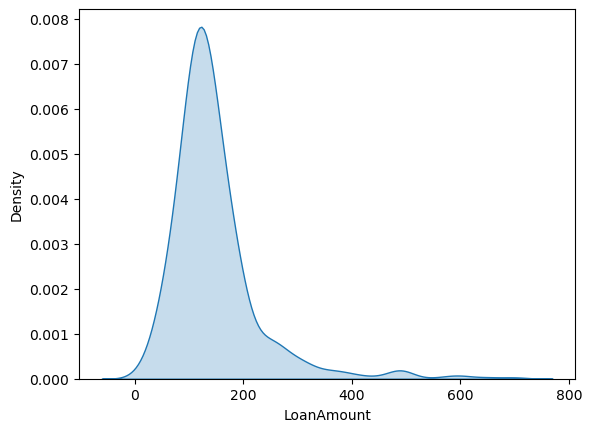

In [22]:
#KDE plotting
sns.kdeplot(x = 'LoanAmount', data = df, shade = True)

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

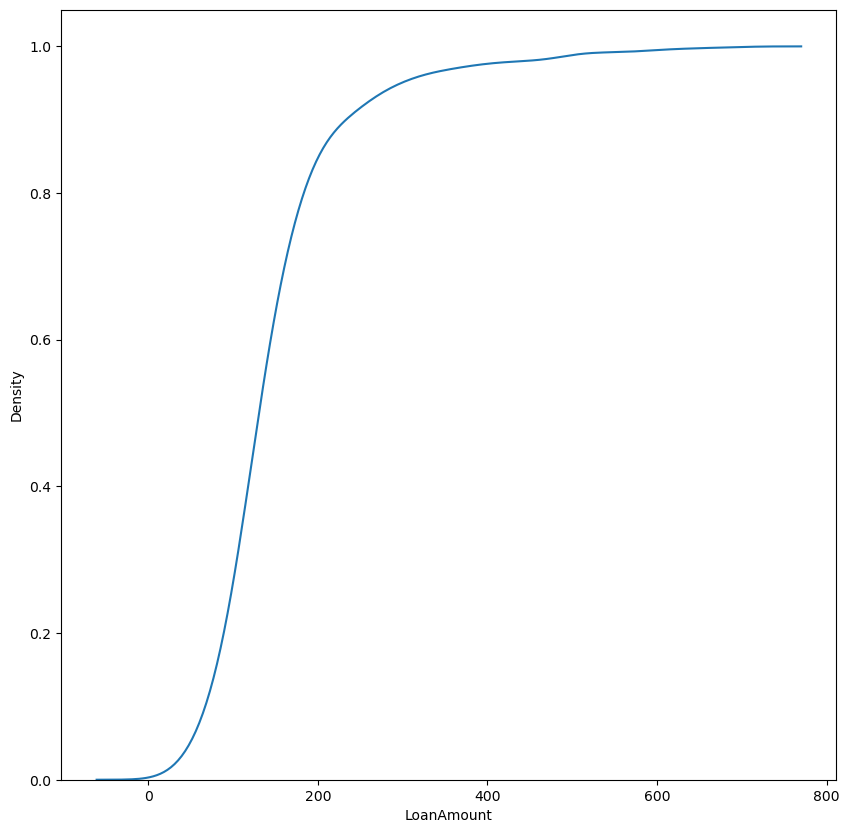

In [23]:
plt.figure(figsize = (10,10)) 
sns.kdeplot(x = 'LoanAmount', data = df, cumulative = True)

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

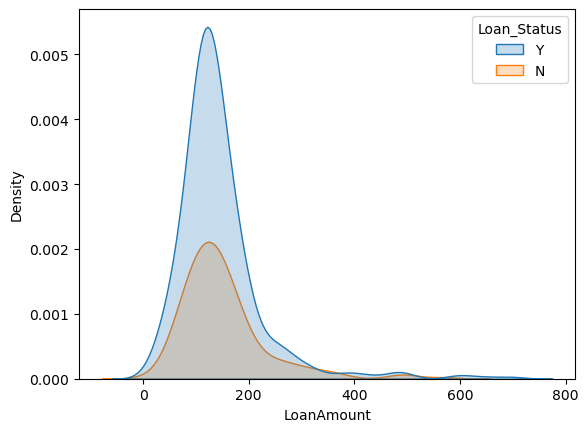

In [24]:
sns.kdeplot(x = 'LoanAmount', data = df, shade = True, hue = 'Loan_Status')

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

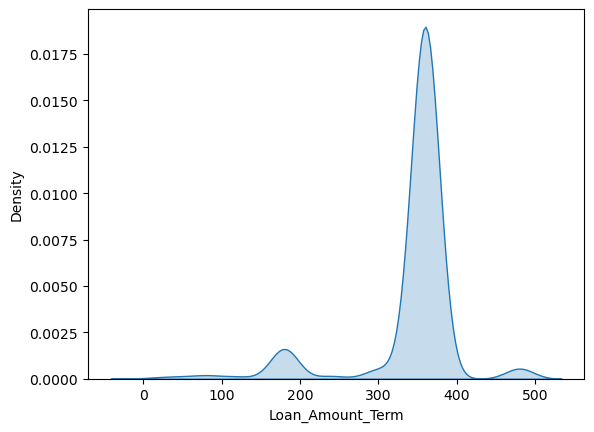

In [25]:
sns.kdeplot(x = 'Loan_Amount_Term', data = df, shade = True)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

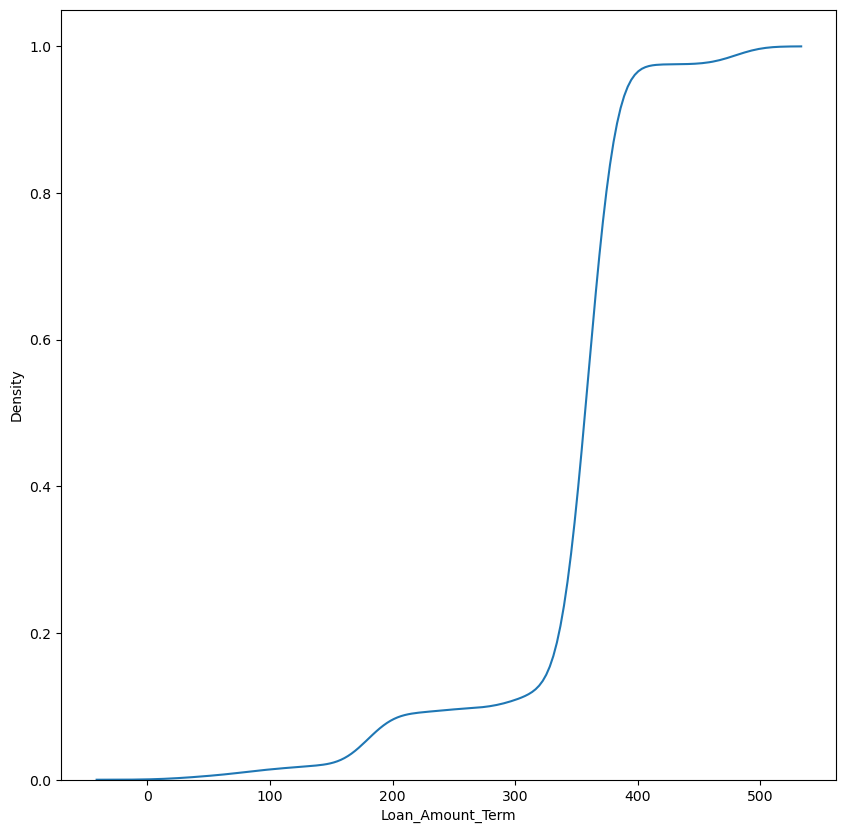

In [26]:
plt.figure(figsize = (10,10)) 
sns.kdeplot(x = 'Loan_Amount_Term', data = df, cumulative = True)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

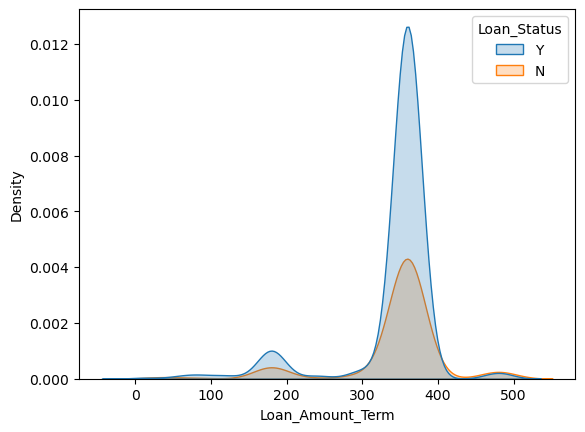

In [27]:
sns.kdeplot(x = 'Loan_Amount_Term', data = df, shade = True, hue = 'Loan_Status')

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

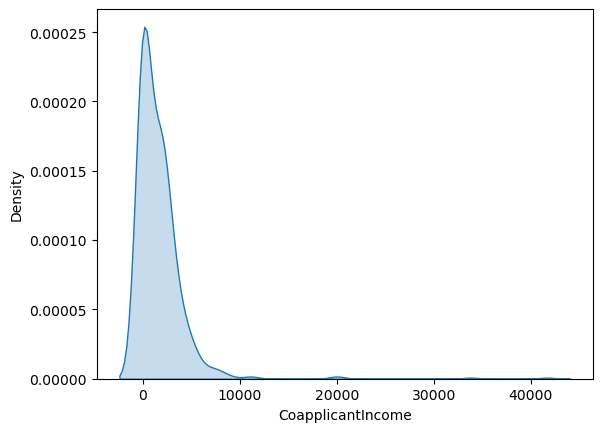

In [28]:
sns.kdeplot(x = 'CoapplicantIncome', data = df, shade = True)

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

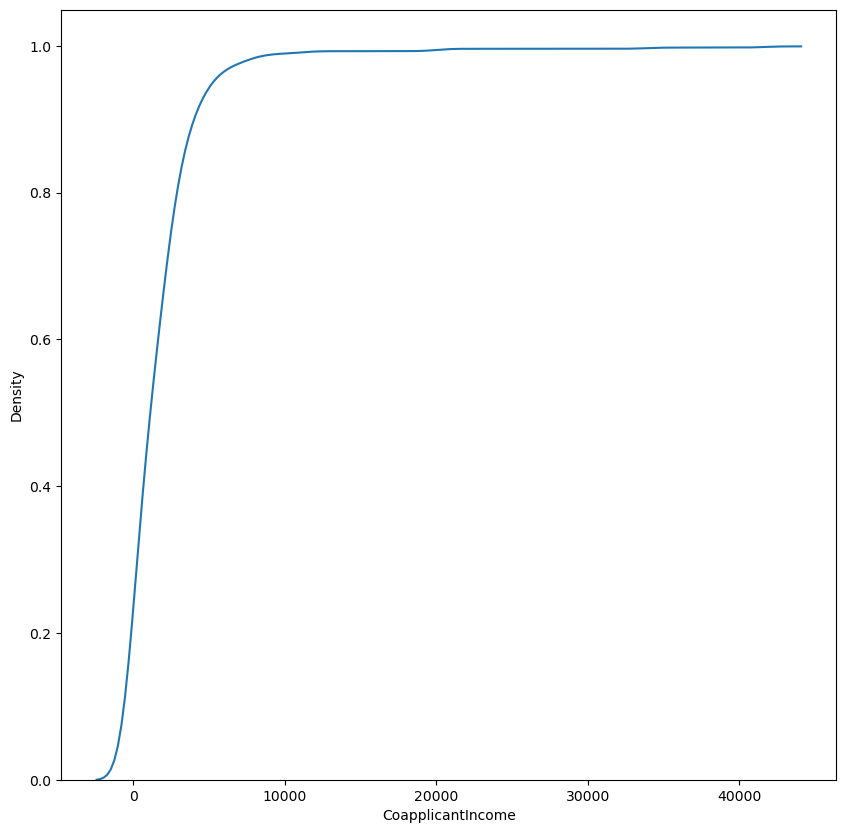

In [29]:
plt.figure(figsize = (10,10)) 
sns.kdeplot(x = 'CoapplicantIncome', data = df, cumulative = True)

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

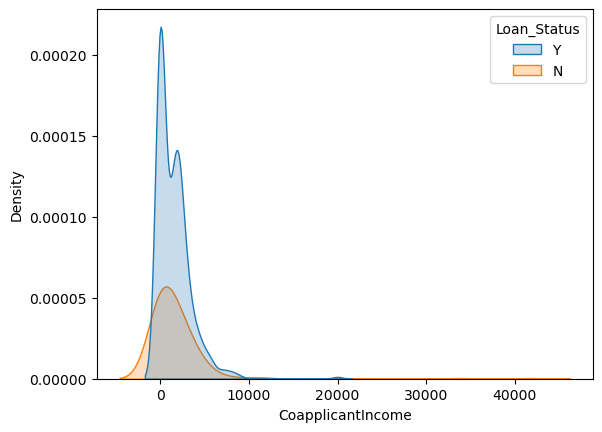

In [30]:
sns.kdeplot(x = 'CoapplicantIncome', data = df, shade = True, hue = 'Loan_Status')

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

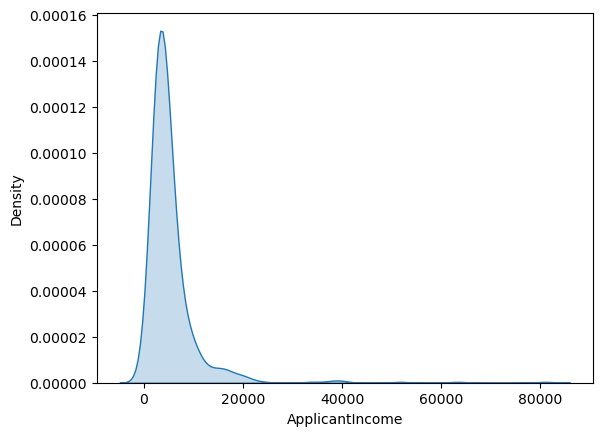

In [31]:
sns.kdeplot(x = 'ApplicantIncome', data = df, shade = True)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

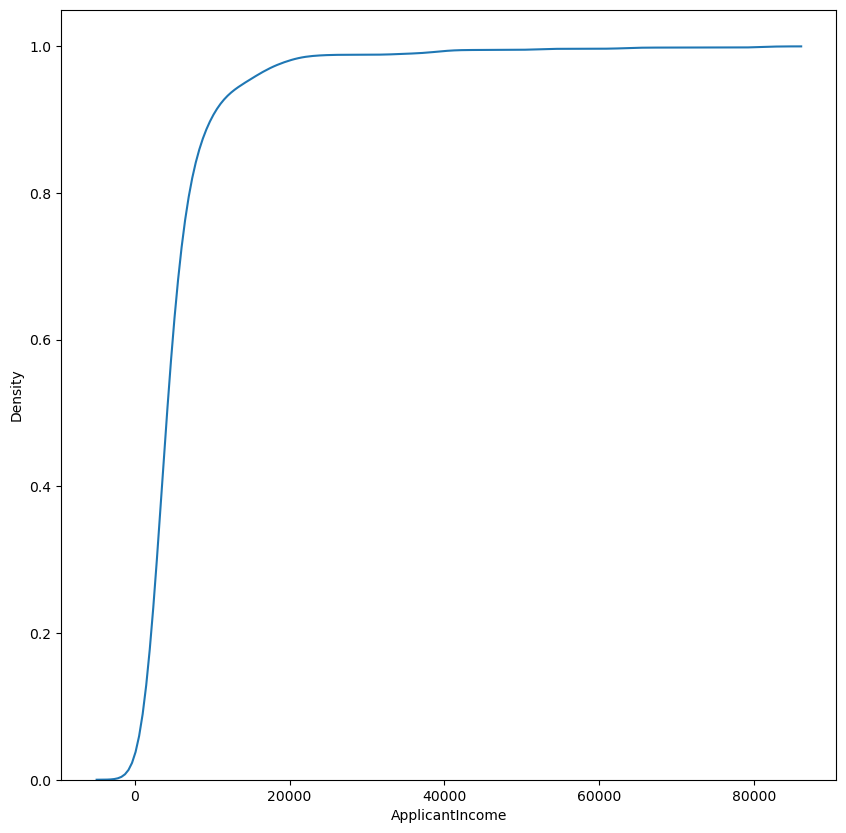

In [32]:
plt.figure(figsize = (10,10)) 
sns.kdeplot(x = 'ApplicantIncome', data = df, cumulative = True)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

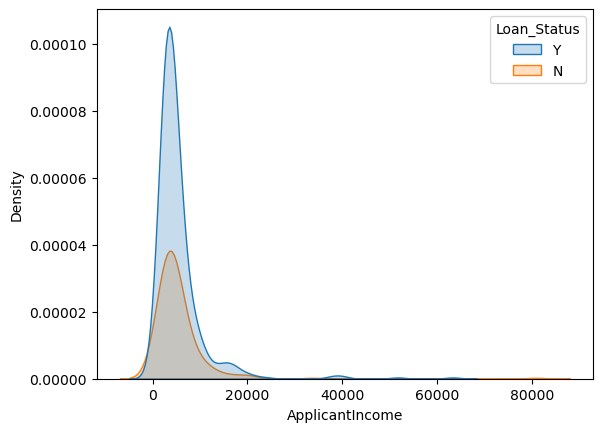

In [33]:
sns.kdeplot(x = 'ApplicantIncome', data = df, shade = True, hue = 'Loan_Status')

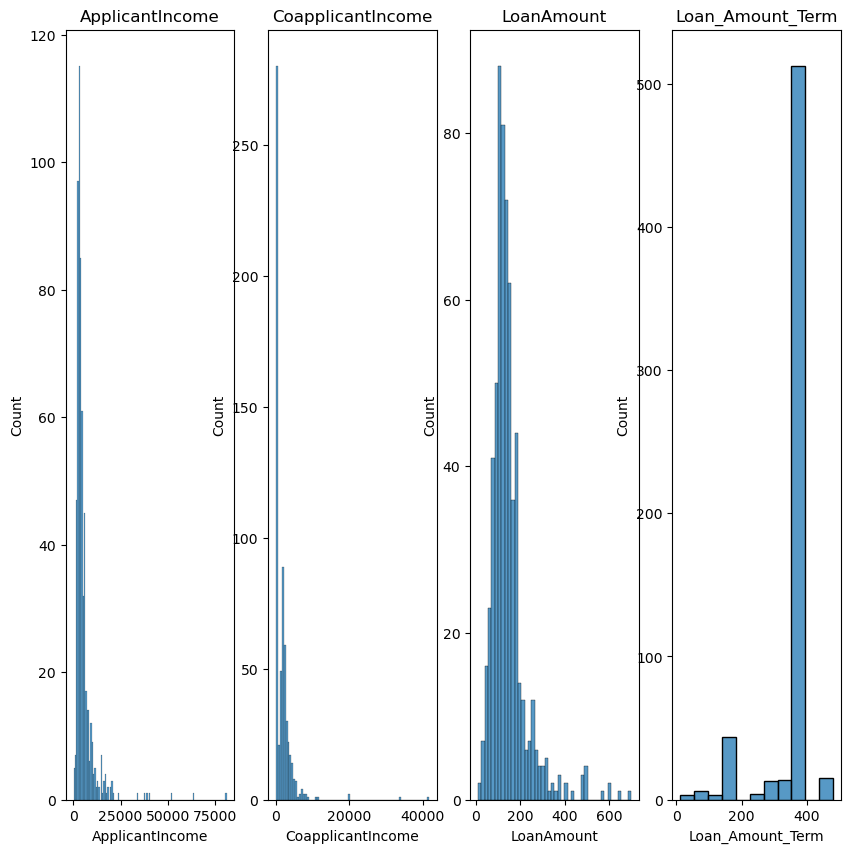

In [34]:
#Histogram without hue
columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
fig=plt.figure(figsize=(10,10))
for i, j in enumerate(columns):
    axis=fig.add_subplot(1,4,i + 1)
    sns.histplot(data=df, x=j, axes=axis)
    axis.set_title(j)
plt.show()

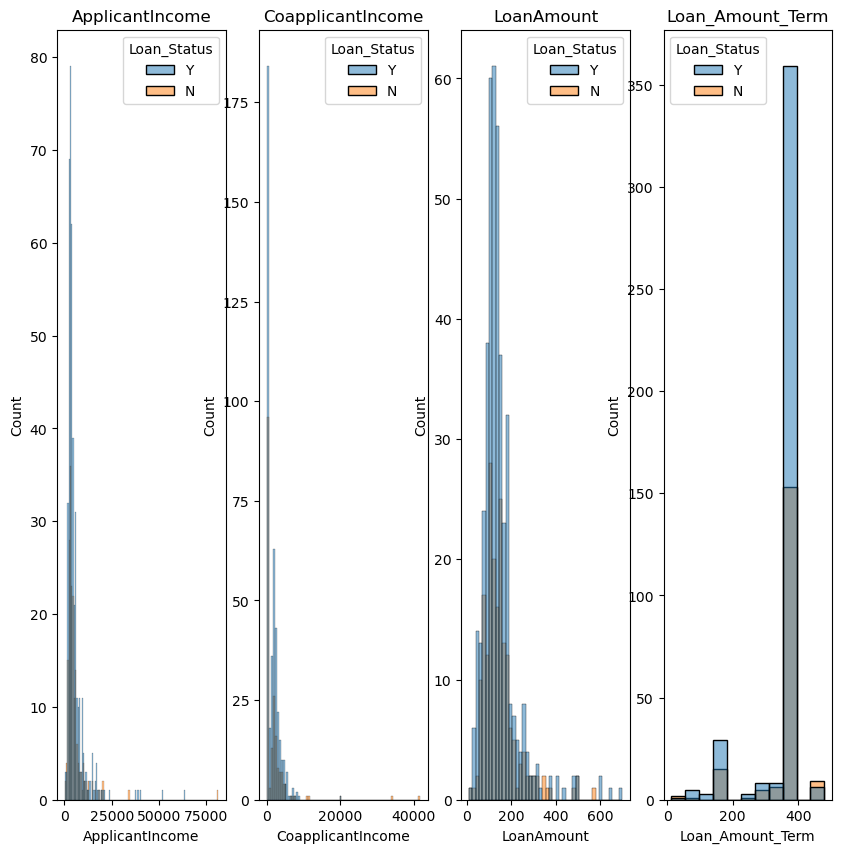

In [35]:
#Histogram with hue
columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
fig=plt.figure(figsize=(10,10))
for i, j in enumerate(columns):
    axis=fig.add_subplot(1,4,i + 1)
    sns.histplot(data=df, x=j, axes=axis,hue = 'Loan_Status')
    axis.set_title(j)
plt.show()

<AxesSubplot:xlabel='Education', ylabel='LoanAmount'>

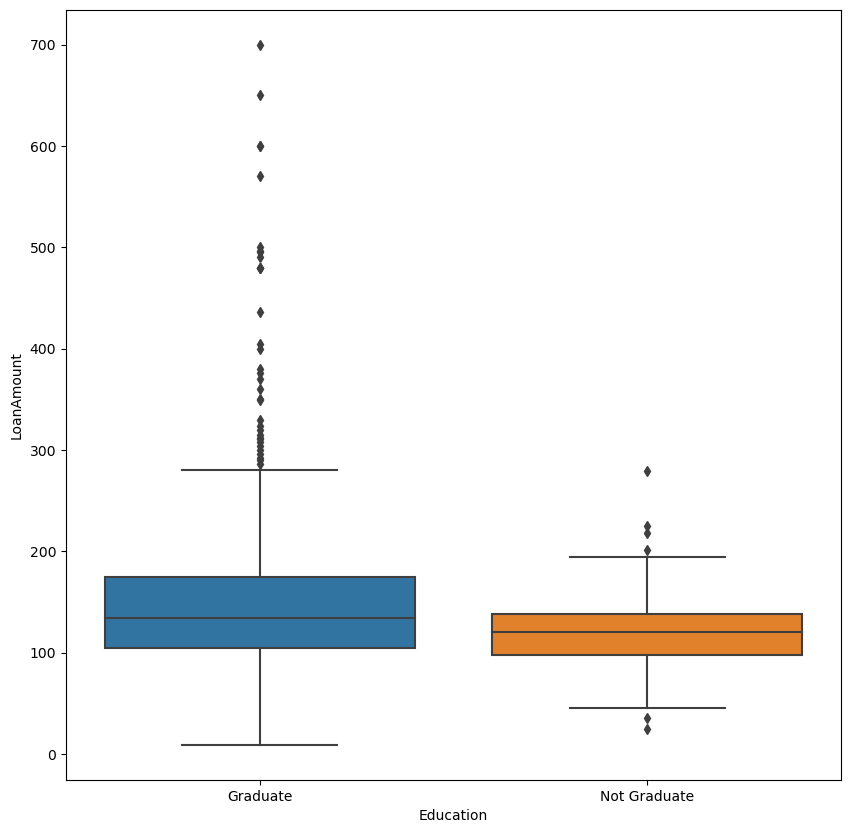

In [36]:
#Boxplot
plt.figure(figsize=(10,10))
sns.boxplot(data=df,x='Education',y='LoanAmount')

<AxesSubplot:xlabel='Education', ylabel='CoapplicantIncome'>

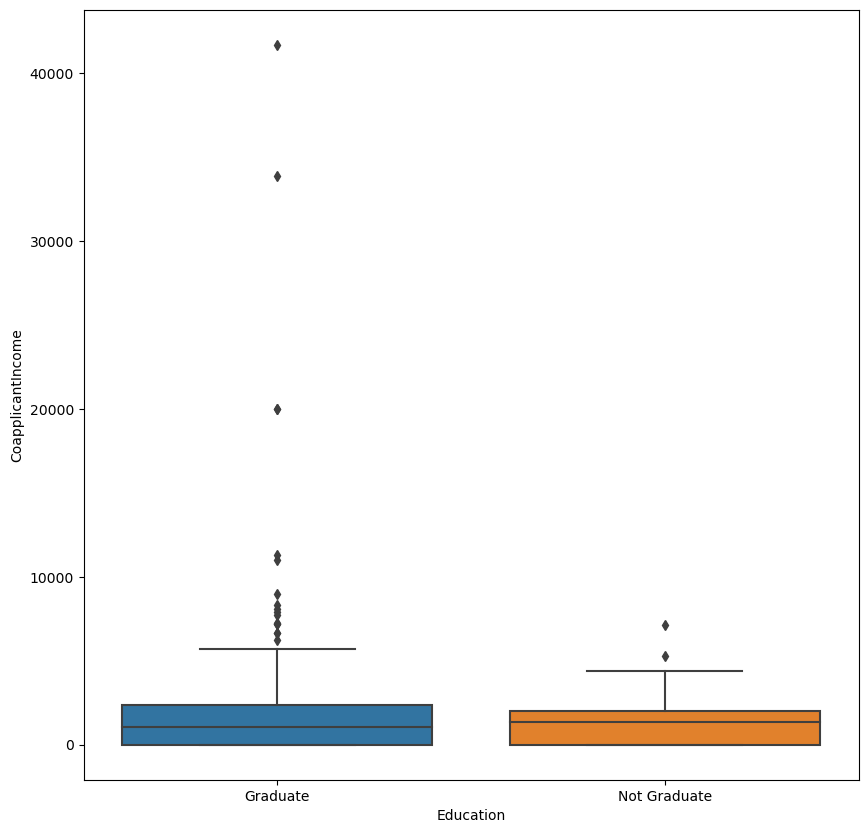

In [37]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df,x= 'Education',y='CoapplicantIncome')

<AxesSubplot:xlabel='Education', ylabel='LoanAmount'>

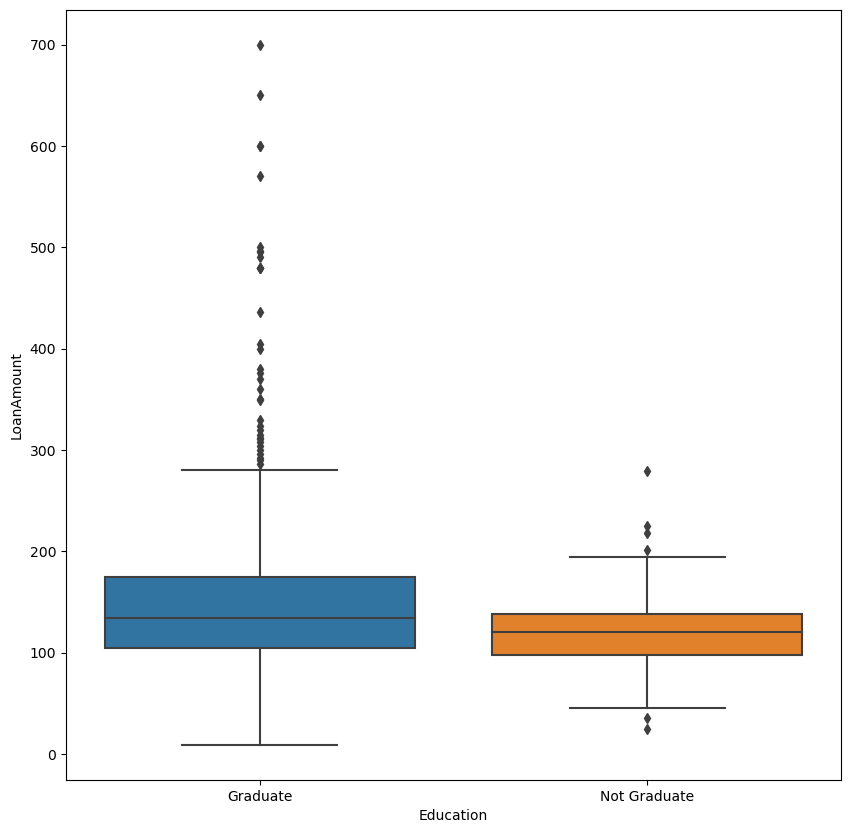

In [38]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df,x= 'Education',y='LoanAmount')

<AxesSubplot:xlabel='Married', ylabel='LoanAmount'>

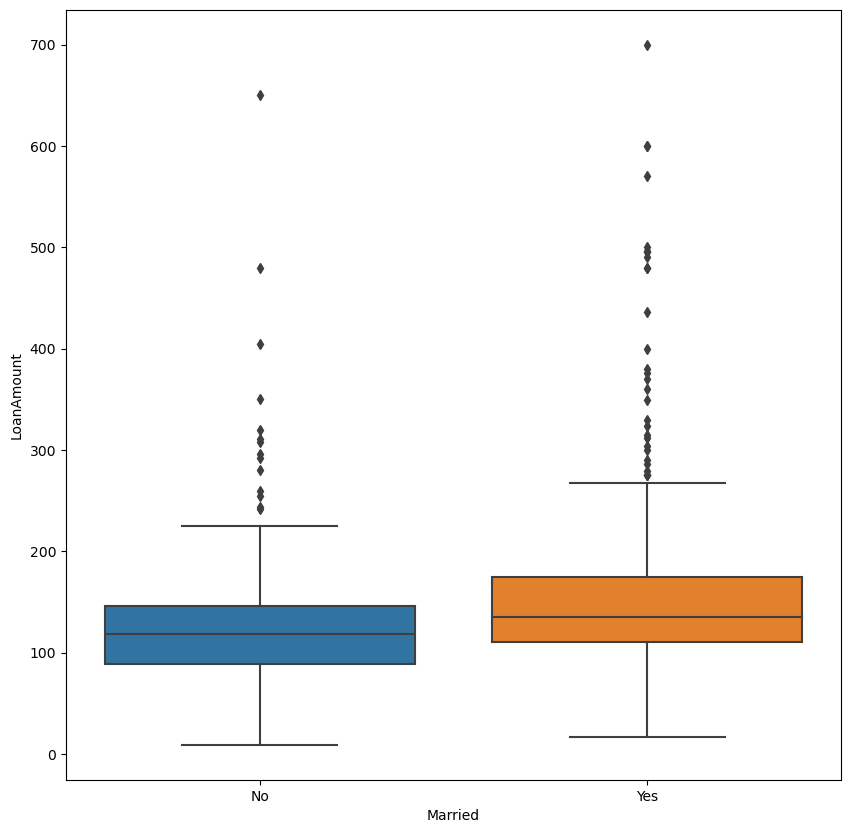

In [39]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df,x='Married',y='LoanAmount')

<AxesSubplot:xlabel='Gender', ylabel='LoanAmount'>

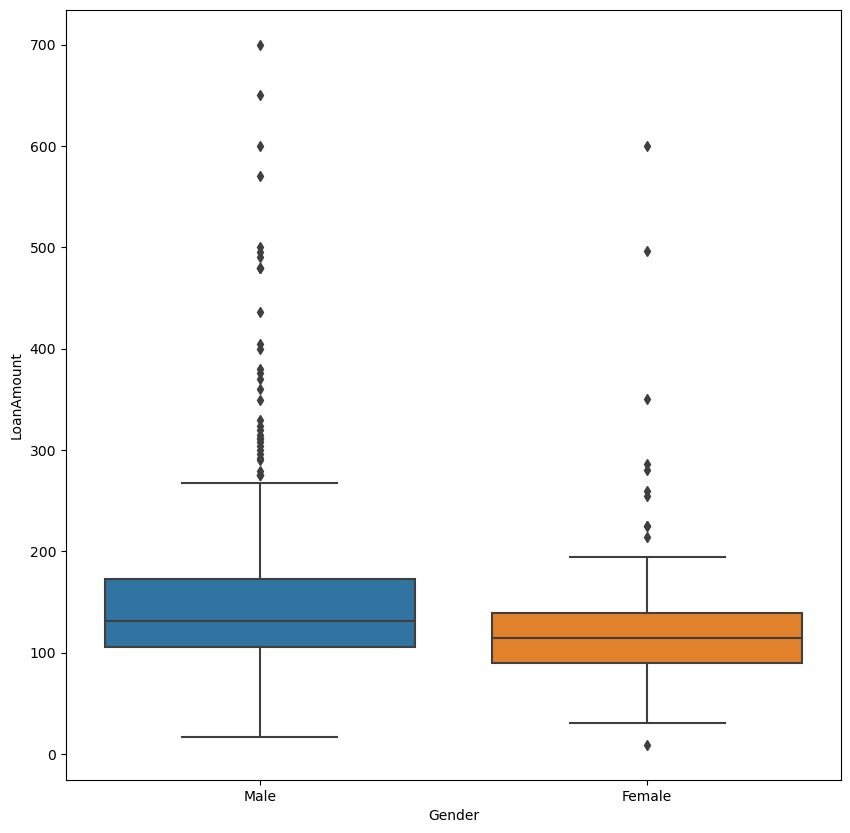

In [40]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df,x='Gender',y='LoanAmount')

<AxesSubplot:xlabel='Self_Employed', ylabel='LoanAmount'>

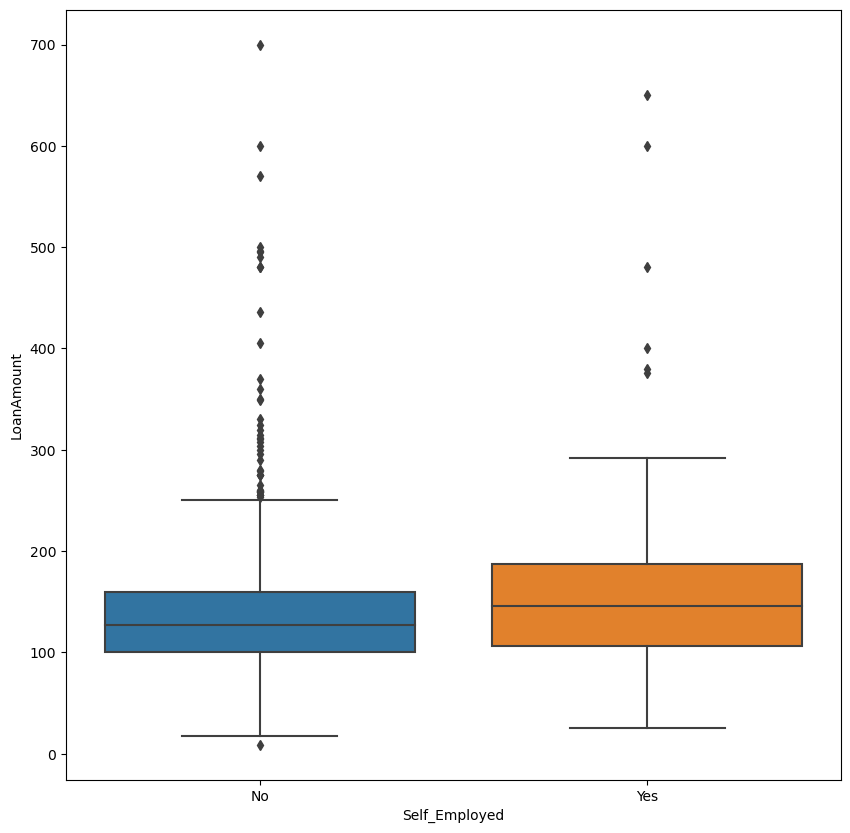

In [41]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df,x='Self_Employed',y='LoanAmount')

<AxesSubplot:xlabel='Property_Area', ylabel='LoanAmount'>

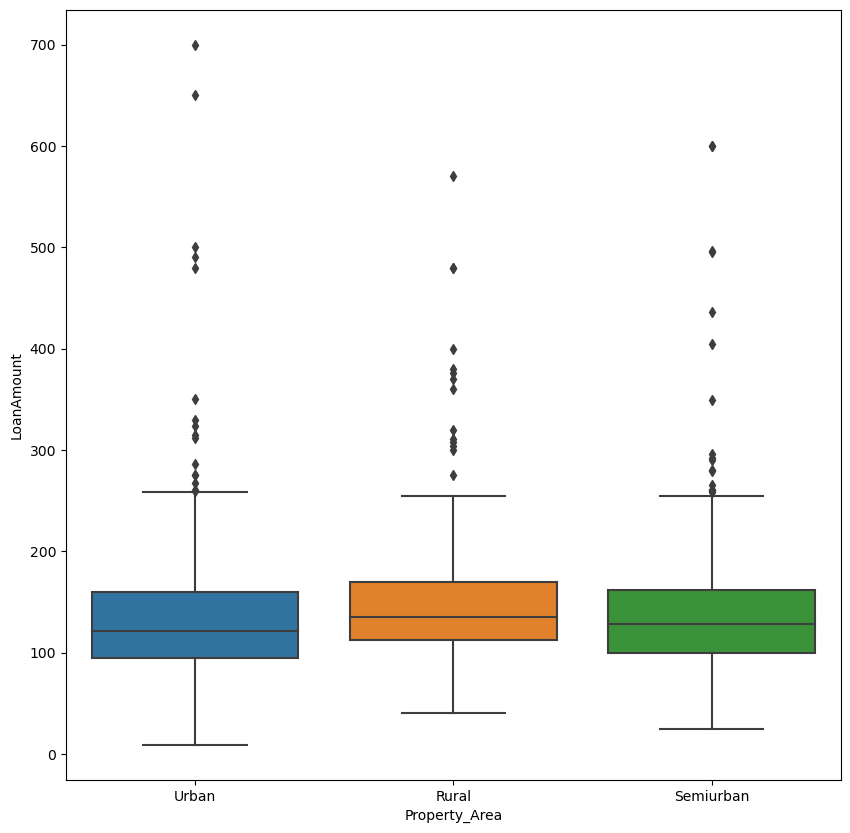

In [42]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df,x='Property_Area',y='LoanAmount')

Text(0.5, 0, 'Loan Amount')

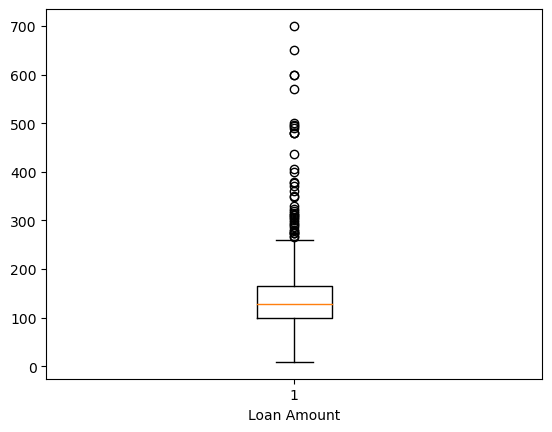

In [43]:
#Outliers Detection
plt.boxplot(df.LoanAmount)
plt.xlabel("Loan Amount")

Text(0.5, 0, 'Applicant Income')

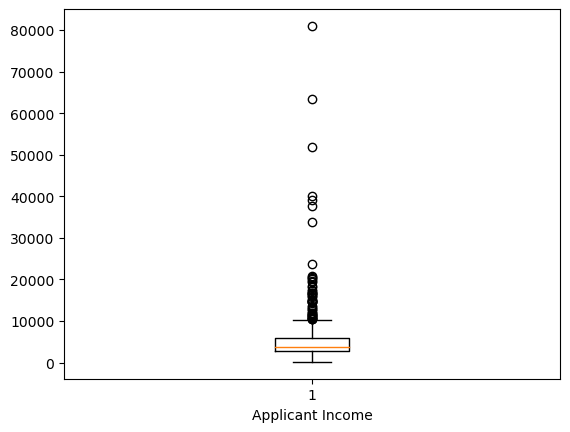

In [44]:
plt.boxplot(df.ApplicantIncome)
plt.xlabel('Applicant Income')

Text(0.5, 0, 'CoApplicant Label')

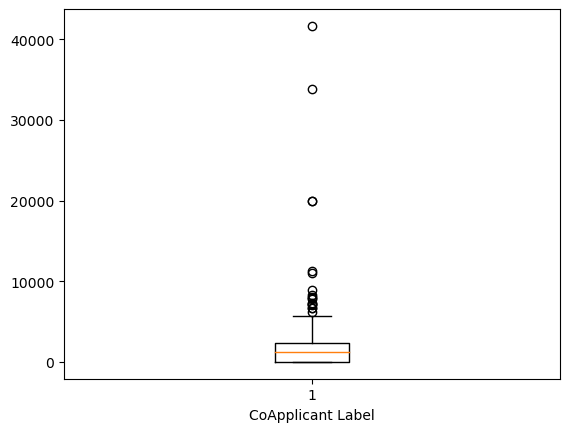

In [45]:
plt.boxplot(df.CoapplicantIncome)
plt.xlabel('CoApplicant Label')

Text(0.5, 0, 'Loan Amount Term')

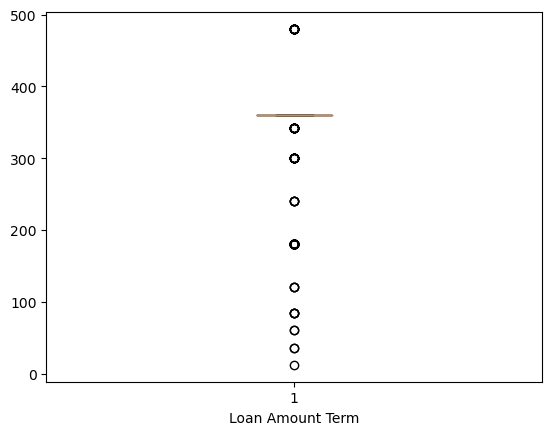

In [46]:
plt.boxplot(df.Loan_Amount_Term)
plt.xlabel('Loan Amount Term')

# Hot Encoding and Feature Scaling

In [47]:
df.drop(columns = 'Loan_ID',inplace = True)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0,146,360,1,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
4,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0,71,360,1,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0,40,180,1,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240,253,360,1,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0,187,360,1,Urban,Y


In [48]:
df1.drop(columns = 'Loan_ID',inplace = True)
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,0,Graduate,No,5720,0,110,360,1,Urban,Y
1,Male,Yes,1,Graduate,No,3076,1500,126,360,1,Urban,Y
2,Male,Yes,2,Graduate,No,5000,1800,208,360,1,Urban,Y
3,Male,Yes,2,Graduate,No,2340,2546,100,360,1,Urban,Y
4,Male,No,0,Not Graduate,No,3276,0,78,360,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777,113,360,1,Urban,Y
363,Male,Yes,0,Graduate,No,4158,709,115,360,1,Urban,Y
364,Male,No,0,Graduate,No,3250,1993,126,360,1,Semiurban,Y
365,Male,Yes,0,Graduate,No,5000,2393,158,360,1,Rural,Y


In [49]:
# Hot Encoding
# We will use the label encoder to encode gender
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() # instantiate label encoder in an object le
df['Gender'] =le.fit_transform(df['Gender'])
df1['Gender'] =le.fit_transform(df1['Gender'])

In [50]:
# We will use the label encoder to encode marriage status
from sklearn.preprocessing import LabelEncoder
marr_le = LabelEncoder() # instantiate label encoder in an object le
df['Married'] =marr_le.fit_transform(df['Married'])
df1['Married'] =le.fit_transform(df1['Married'])

In [51]:
# We will use the label encoder to encode dependants
from sklearn.preprocessing import LabelEncoder
depn_le = LabelEncoder() # instantiate label encoder in an object le
df['Dependents'] =depn_le.fit_transform(df['Dependents'])
df1['Dependents'] =depn_le.fit_transform(df1['Dependents'])

In [52]:
# We will use the label encoder to encode education
from sklearn.preprocessing import LabelEncoder
edu_le = LabelEncoder() # instantiate label encoder in an object le
df['Education'] =edu_le.fit_transform(df['Education'])
df1['Education'] =edu_le.fit_transform(df1['Education'])

In [53]:
# We will use the label encoder to employment
from sklearn.preprocessing import LabelEncoder
emp_le = LabelEncoder() # instantiate label encoder in an object le
df['Self_Employed'] =emp_le.fit_transform(df['Self_Employed'])
df1['Self_Employed'] =emp_le.fit_transform(df1['Self_Employed'])

In [54]:
# We will use the label encoder to Credit_History
from sklearn.preprocessing import LabelEncoder
crd_le = LabelEncoder() # instantiate label encoder in an object le
df['Credit_History'] =crd_le.fit_transform(df['Credit_History'])
df1['Credit_History'] =crd_le.fit_transform(df1['Credit_History'])

In [55]:
# We will use the label encoder to Loan status
from sklearn.preprocessing import LabelEncoder
ls_le = LabelEncoder() # instantiate label encoder in an object le
df['Loan_Status'] =ls_le.fit_transform(df['Loan_Status'])
df1['Loan_Status'] =ls_le.fit_transform(df1['Loan_Status'])

In [56]:
#We need to provide numerical representations to categotical attributes of train data
df = pd.get_dummies(df, columns = ['Property_Area'])

In [57]:
#We need to provide numerical representations to categotical attributes of test data
df1 = pd.get_dummies(df1, columns = ['Property_Area'])

In [58]:
 df = df.drop(['Property_Area_Semiurban'], axis='columns')

In [59]:
 df1 = df1.drop(['Property_Area_Semiurban'], axis='columns')

In [60]:
# We need to scale correctly (We will use MinMax Scaler to do this)
from sklearn.preprocessing import MinMaxScaler
cols_to_scale = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Dependents'] # new list of columns for scaling
scaler = MinMaxScaler() # instantiate min_max_scaler in an object scaler

scaler.fit(df[cols_to_scale]) # learning min and max parameters from X_train

df[cols_to_scale] = scaler.transform(df[cols_to_scale])
df1[cols_to_scale] = scaler.transform(df1[cols_to_scale])

In [61]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Urban
0,1,0,0.000000,0,0,0.070489,0.000000,0.198263,0.743590,1,1,0,1
1,1,1,0.333333,0,0,0.054830,0.036192,0.172214,0.743590,1,0,1,0
2,1,1,0.000000,0,1,0.035250,0.000000,0.082489,0.743590,1,1,0,1
3,1,1,0.000000,1,0,0.030093,0.056592,0.160637,0.743590,1,1,0,1
4,1,0,0.000000,0,0,0.072356,0.000000,0.191027,0.743590,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0.000000,0,0,0.034014,0.000000,0.089725,0.743590,1,1,1,0
610,1,1,1.000000,0,0,0.048930,0.000000,0.044863,0.358974,1,1,1,0
611,1,1,0.333333,0,0,0.097984,0.005760,0.353111,0.743590,1,1,0,1
612,1,1,0.666667,0,0,0.091936,0.000000,0.257598,0.743590,1,1,0,1


In [62]:
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Urban
0,1,1,0.000000,0,0,0.068893,0.000000,0.146165,0.743590,1,1,0,1
1,1,1,0.333333,0,0,0.036190,0.036000,0.169320,0.743590,1,1,0,1
2,1,1,0.666667,0,0,0.059988,0.043200,0.287988,0.743590,1,1,0,1
3,1,1,0.666667,0,0,0.027087,0.061104,0.131693,0.743590,1,1,0,1
4,1,0,0.000000,1,0,0.038664,0.000000,0.099855,0.743590,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,1.000000,1,1,0.047730,0.042648,0.150507,0.743590,1,1,0,1
363,1,1,0.000000,0,0,0.049573,0.017016,0.153401,0.743590,1,1,0,1
364,1,0,0.000000,0,0,0.038343,0.047832,0.169320,0.743590,1,1,0,0
365,1,1,0.000000,0,0,0.059988,0.057432,0.215630,0.743590,1,1,1,0


In [63]:
for col in df:
    print(f'{col}: {df[col].unique()}')

Gender: [1 0]
Married: [0 1]
Dependents: [0.         0.33333333 0.66666667 1.        ]
Education: [0 1]
Self_Employed: [0 1]
ApplicantIncome: [7.04885591e-02 5.48299320e-02 3.52504638e-02 3.00927644e-02
 7.23562152e-02 6.51453309e-02 2.70006184e-02 3.56957328e-02
 4.76932591e-02 1.56969697e-01 3.77241806e-02 2.90661719e-02
 3.61533704e-02 2.10636982e-02 1.42115028e-02 5.93692022e-02
 4.26221398e-02 4.15584416e-02 5.85899814e-02 3.03030303e-02
 9.28880643e-02 7.17996289e-02 3.97649969e-02 4.41187384e-02
 1.16388374e-01 3.27643785e-02 5.04143476e-02 1.59802103e-02
 4.45269017e-02 4.96722325e-02 3.73160173e-02 5.61781076e-02
 4.14347557e-02 1.52752010e-01 2.62832406e-02 2.07544836e-02
 4.35003092e-02 4.45021645e-02 4.26716141e-02 2.04081633e-02
 2.78293135e-02 4.68893012e-02 5.62152134e-02 4.03215832e-02
 6.80148423e-02 7.01422387e-02 3.08596166e-02 4.76190476e-02
 2.19913420e-02 3.63141620e-02 5.04638219e-02 5.52380952e-02
 1.40383426e-01 3.16388374e-02 2.45145331e-02 3.97773655e-02
 9.8

# Feature Selection

In [64]:
# Separate the independent (X) and dependent (y) features of train and test data
y_train = df['Loan_Status']
X_train = df.drop(columns = 'Loan_Status')
y_test = df1['Loan_Status']
X_test = df1.drop(columns = 'Loan_Status')

In [65]:
X_train.shape, X_test.shape

((614, 12), (367, 12))

In [66]:
# Using Pearson's correlation

corr = X_train.corr()

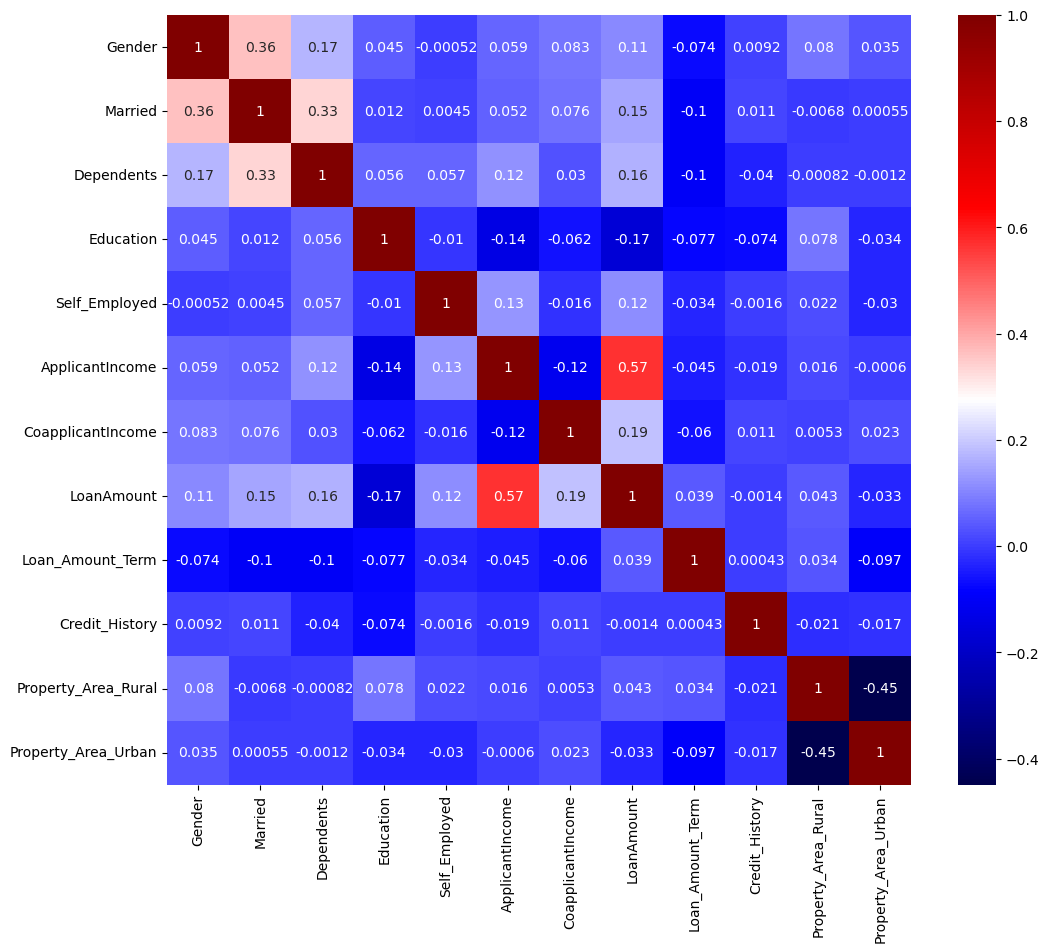

In [67]:
# Using heatmap to visualize the correlation

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap="seismic")
plt.show()

In [68]:
# with the following function we can select highly correlated features
# it will remove the first feature that is highly correlated with another feature

def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of the redundant columns
    corr_matrix = dataset.corr() # correlation matrix of all the features
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i, j])) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [69]:
corr_features = correlation(X_train, 0.7) # 85% is a good value of the threshold. It is a hyperparameter
print(len(corr_features))
print(corr_features)

0
set()


# There are no highly correlated features to be dropped 

# SMOTE

In [70]:
from imblearn.over_sampling import SMOTE

y_train.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [71]:
y_test.value_counts()

1    331
0     36
Name: Loan_Status, dtype: int64

In [72]:
smote = SMOTE(sampling_strategy='minority')

X_train1, y_train1 = smote.fit_resample(X_train, y_train)

y_train1.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

In [73]:
y_test.value_counts()

1    331
0     36
Name: Loan_Status, dtype: int64

# KNN Implementation and metrics

In [74]:
from sklearn.neighbors import KNeighborsClassifier

#base model
knn_clf = KNeighborsClassifier() # Euclidean Distance Metric
knn_clf.fit(X_train, y_train)

#predict
y_pred = knn_clf.predict(X_test)

#accuracy metrics
print(classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_train, knn_clf.predict(X_train))) # compare training actual and predicted value
print("Test Accuracy: ", accuracy_score(y_test, y_pred)) # compare test actual and predicted value

              precision    recall  f1-score   support

           0       0.16      0.33      0.22        36
           1       0.92      0.82      0.86       331

    accuracy                           0.77       367
   macro avg       0.54      0.57      0.54       367
weighted avg       0.84      0.77      0.80       367

Train Accuracy:  0.8127035830618893
Test Accuracy:  0.7683923705722071


In [75]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

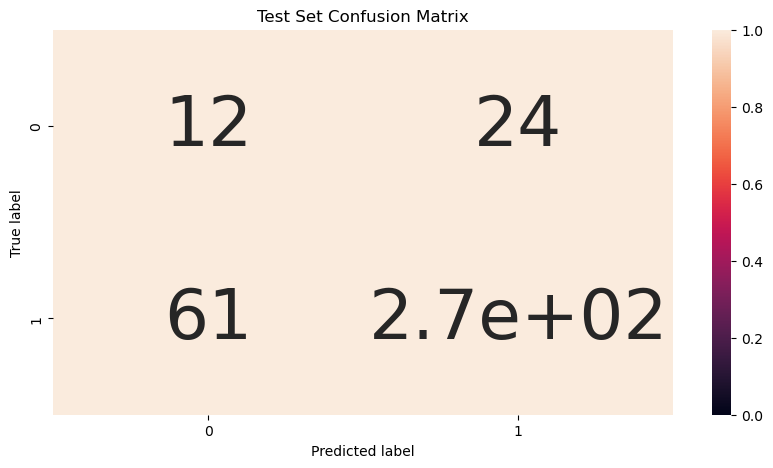

In [76]:
# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (10,5))
plot_confusion_matrix(cm, classes=knn_clf.classes_, title='Test Set Confusion Matrix')

# GridSearchCV for KNN

In [77]:
# import libraries
from sklearn.model_selection import RepeatedStratifiedKFold,GridSearchCV

#set params
knn_params = {
    "n_neighbors": range(1,31,1),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "minkowski"],
    
}

knn_clf = KNeighborsClassifier()

cv = RepeatedStratifiedKFold(n_splits=20, n_repeats=10, random_state=30)
grid_search = GridSearchCV(estimator=knn_clf, param_grid=knn_params, n_jobs=-1, cv=cv, scoring="accuracy", error_score=0)
grid_results = grid_search.fit(X_train,y_train)

In [78]:
grid_results.best_params_

{'metric': 'euclidean', 'n_neighbors': 18, 'weights': 'uniform'}

In [79]:
#retrain model using new params
final_model_knn = knn_clf.set_params(**grid_results.best_params_)
final_model_knn.fit(X_train,y_train)
y_pred = final_model_knn.predict(X_test)

#accuracy metrics
print(classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_train, knn_clf.predict(X_train))) # compare training actual and predicted value
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.20      0.31      0.24        36
           1       0.92      0.87      0.89       331

    accuracy                           0.81       367
   macro avg       0.56      0.59      0.57       367
weighted avg       0.85      0.81      0.83       367

Train Accuracy:  0.8061889250814332
Test Accuracy:  0.8119891008174387


# SVM Implementation and Metrics

In [80]:
from sklearn.svm import SVC
svm_classifier = SVC()# kernal rbf
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
print(classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_train, svm_classifier.predict(X_train))) # compare training actual and predicted value
print("Test Accuracy: ", accuracy_score(y_test, y_pred)) # compare test actual and predicted values

              precision    recall  f1-score   support

           0       0.20      0.33      0.25        36
           1       0.92      0.86      0.89       331

    accuracy                           0.81       367
   macro avg       0.56      0.60      0.57       367
weighted avg       0.85      0.81      0.83       367

Train Accuracy:  0.8110749185667753
Test Accuracy:  0.8065395095367848


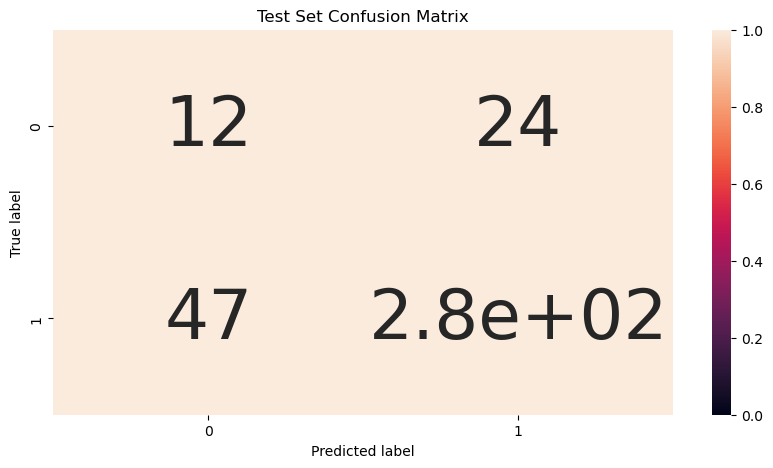

In [81]:
y_pred = svm_classifier.predict(X_test)

# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (10,5))
plot_confusion_matrix(cm, classes=svm_classifier.classes_, title='Test Set Confusion Matrix')

# SVM after GridSearchCV

In [82]:
#parameters for SVM
svm_parameters= {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [83]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = SVC(), param_grid = svm_parameters,scoring = 'accuracy', verbose = 2)
grid_search = grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ...................

[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ..................C=100, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C

In [84]:
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

Best: 0.809463 using {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


# Decision Tree and metrics

In [85]:
from sklearn import tree # used to visualize the decision tree model
from sklearn.tree import DecisionTreeClassifier, export_graphviz

#decision tree


dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred= dt.predict(X_test)

print(classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_train, dt.predict(X_train))) # compare training actual and predicted value
print("Test Accuracy: ", accuracy_score(y_test, y_pred)) # compare test actual and predicted value

              precision    recall  f1-score   support

           0       0.15      0.56      0.24        36
           1       0.93      0.66      0.78       331

    accuracy                           0.65       367
   macro avg       0.54      0.61      0.51       367
weighted avg       0.86      0.65      0.72       367

Train Accuracy:  1.0
Test Accuracy:  0.6539509536784741


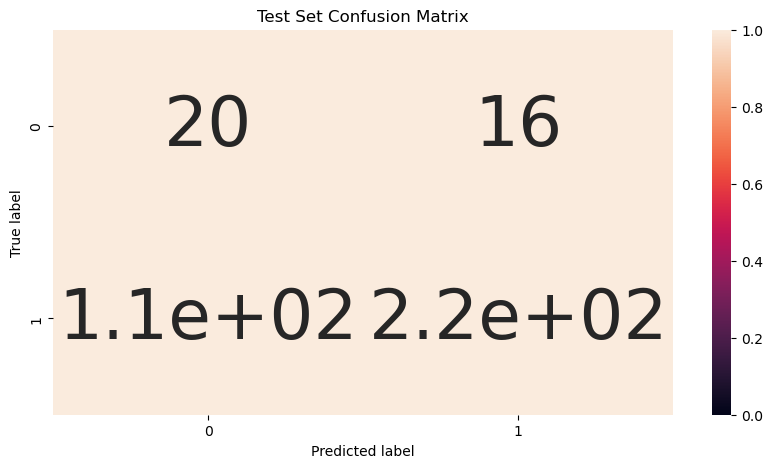

In [86]:
y_pred = dt.predict(X_test)

# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (10,5))
plot_confusion_matrix(cm, classes=dt.classes_, title='Test Set Confusion Matrix')

# Decision Tree with GridSearchCV

In [87]:
# GridSearchCV for Decision Tree

from sklearn.model_selection import GridSearchCV

param_dist={"criterion":["gini","entropy"],
           "max_depth":[1,2,3,4,5,6,7,None]}

grid=GridSearchCV(dt,param_grid=param_dist, cv=10, n_jobs=-1)
grid.fit(X_train,y_train)
print("Best: %f using %s" % (grid.best_score_, grid.best_params_))

Best: 0.809572 using {'criterion': 'gini', 'max_depth': 1}


# Logistic Regression and Metrics

In [88]:
from sklearn.linear_model import LogisticRegression
lrclassifier = LogisticRegression()
lrclassifier.fit(X_train, y_train)
y_pred = lrclassifier.predict(X_test)
print(classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_train, lrclassifier.predict(X_train))) # compare training actual and predicted value
print("Test Accuracy: ", accuracy_score(y_test, y_pred)) # compare test actual and predicted values

              precision    recall  f1-score   support

           0       0.20      0.33      0.25        36
           1       0.92      0.86      0.89       331

    accuracy                           0.81       367
   macro avg       0.56      0.60      0.57       367
weighted avg       0.85      0.81      0.83       367

Train Accuracy:  0.8094462540716613
Test Accuracy:  0.8065395095367848


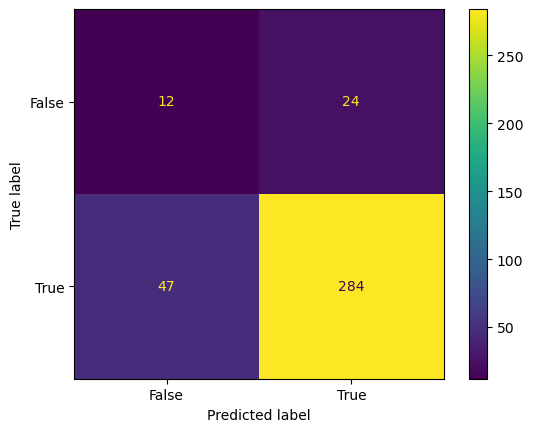

In [89]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(2,.8,size = 1000)
predicted = numpy.random.binomial(2,.8,size = 1000)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

# Logistic Regression after GridSearchCV

In [90]:
#parameters for Logistic Regression
parameters = { "dual":[True,False],"max_iter":[100,110,120,130,140],"multi_class":['ovr','auto'],"C" :[1.0,1.5,2.0,2.5]}

In [91]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = LogisticRegression(), param_grid = parameters, scoring = "accuracy", cv = 10, n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

Best: 0.807959 using {'C': 1.0, 'dual': False, 'max_iter': 100, 'multi_class': 'ovr'}


# LIME for KNN

In [92]:
%pip install lime

import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['0', '1'], # Check your class names in the CSV file. It should be 1, 2, 3, 4, 5 I think
    mode='classification'
)

exp = explainer.explain_instance(
    data_row=X_test.iloc[0],
    predict_fn=knn_clf.predict_proba
)

exp.show_in_notebook(show_table=True)

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
